---

<h2 style="text-align: center;"><b>Neuron with different activation functions</b></h2>

---

 Let'simplement a neuron with different activation functions: Sigmoid, Rely, LeakyReLU and ELU.

In [0]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [0]:
def seed_random(seed, *args):
    np.random.seed(seed)
    return np.random.rand(*args)

---

In [0]:
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)

<h2 style="text-align: center;"><b>Neuron with ReLU (Recitified Linear Unit)</b></h2>  

ReLU is the most popular activation function in neural networks:

\begin{equation*}
ReLU(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Or:

$$
ReLU(x) = \max(0, x)
$$

In a (free) translation of the Rectified Linear Unit = "a Truncated linear function". Actually, we essentially just do not allow negative numbers to pass.

The derivative here is taken as a derivative of a piecewise given function, that is, in areas where the function is smooth (x < 0 and x > 0), we take the derivative as usual, and at zero we add it to zero:

\begin{equation*}
ReLU'(x) = 
 \begin{cases}
   0, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

* ReLu and its derivative

In [0]:
def relu(x):
    """ReLU-функция"""
    return x * (x > 0).astype(float)

In [0]:
def relu_derivative(y):
    """Производная ReLU. Мы вычисляем ее не по x, который подставили в ReLU, а по значению, который она вернула. 
    На самом деле, мы могли бы так не делать и вычислять производную по x (код при этом даже не поменялся бы), 
    но обычно на стадии обратного прохода у нас уже нет X @ w, который мы передавали в функцию, зато есть 
    вычисленное значение активации - тот самый y"""
    return (y > 0).astype(float)

New activation function:

In [0]:
class NeuronReLU:
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # Пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b
        
    def activate(self, x):
        return relu(x)
        
    def forward_pass(self, X):
        """
        Рассчитывает ответ нейрона при предъявлении набора объектов
        :param: X -- матрица примеров размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - предсказанные классы
        return self.activate(X @ self.w + self.b)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов нейрона в соответствии с этим объектом
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        
        # Можете проверить, что такие матричные перемножения дают именно то, что мы хотим
        w_grad = 1/n * (X * relu_derivative(y_pred)).T @ (y_pred - y) 
        self.w -= learning_rate * w_grad
        b_grad = (1/n * relu_derivative(y_pred).T @ (y_pred - y))[0]
        self.b -= learning_rate * b_grad
    
    def fit(self, X, y, num_epochs=300):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        """
        if self.w is None:
            self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
            self.b = 0  # смещение (число)
        Loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
            
        return Loss_values

<h3 style="text-align: center;"><b>Training a neuron with ReLU</b></h3>  

**Check forward_pass()**

In [0]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = NeuronReLU(w, b)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[ 9.]
 [12.]
 [-0.]]


*Hint: "**-0.**" -- just a null*

**Test backward_pass()**

`learning rate=0.005` .

In [0]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [0]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

w = [[0.94666667]
 [1.88      ]]
b = [1.96666667]


"Яблоки и Груши":

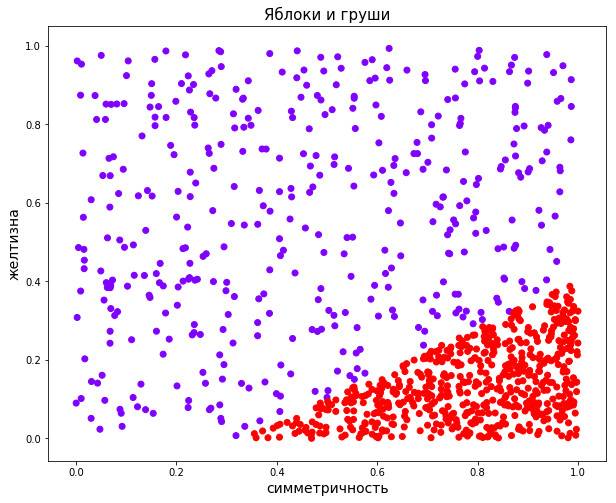

In [0]:
data = pd.read_csv("./data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [0]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

Training Loss on the dataset:

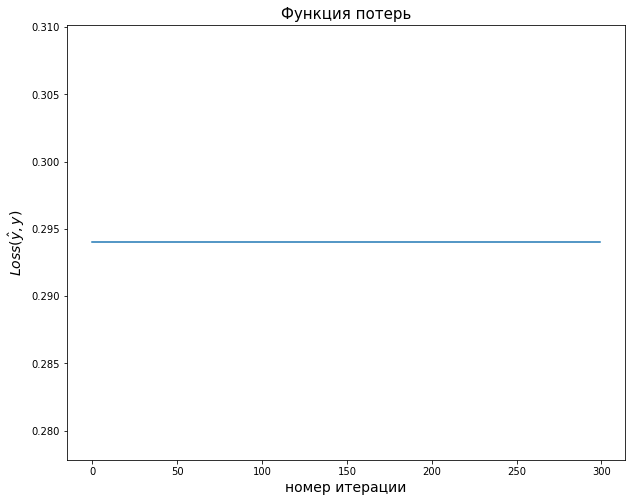

Wall time: 187 ms


In [0]:
%%time

neuron = NeuronReLU()
Loss_values = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

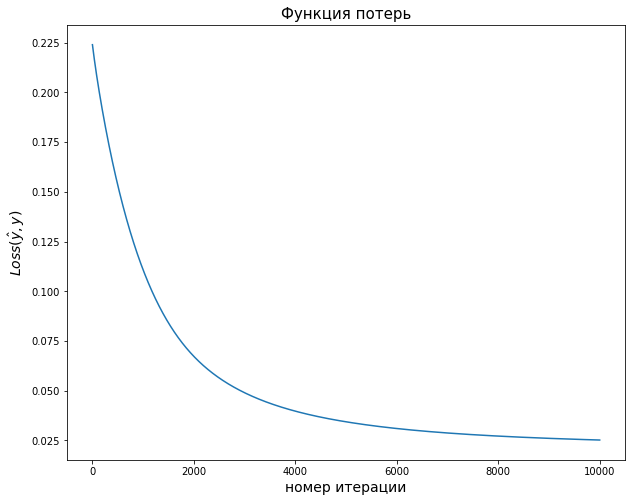

Wall time: 879 ms


In [0]:
%%time

neuron = NeuronReLU(w=seed_random(42, X.shape[1], 1), b=seed_random(43, 1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

**Loss check**

Printing the sum of the first five and last five values of loss'a when learning with num_epochs=10000, round to the 4th decimal place

In [0]:
sum(Loss_values[:5]) + sum(Loss_values[-5:])

1.2438665034151923

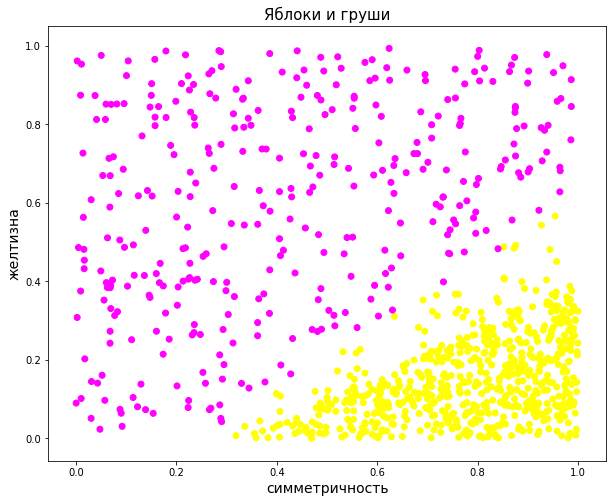

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Advantages ReLU:**

* differentiable (with additional definition in zero)
* there is no problem of fading gradient, as in the sigmoid

**Potential disadvantages ReLU:**

* not centered near 0 (may interfere with convergence rate)
* nullifies all negative inputs, thus weights in zeroed neurons can often *not be updated*, this problem is sometimes called * dead neurons*

<h2 style="text-align: center;"><b>Neuron with LeakyReLU (Leaky Recitified Linear Unit)</b></h2>  

LeakyReLU very slightly different from ReLU, but often helps the network to learn faster as there is no problem of " dead neurons":

\begin{equation*}
LeakyReLU(x) =
 \begin{cases}
   \alpha x, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

where $\alpha$ --small number from 0 to 1.

The derivate the same, but $\alpha$:

\begin{equation*}
LeakyReLU'(x) = 
 \begin{cases}
   \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Graph looks like:

<img src="https://cdn-images-1.medium.com/max/1600/0*UtLlZJ80TMIM7kXk." width=400 height=300>


* LeakyReLU :

In [0]:
def leaky_relu(x, alpha=0.01):
    """LeakyReLU-функция"""
    x[x < 0] *= alpha
    return x

In [0]:
def leaky_relu_derivative(y, alpha=0.01):
    """Производная LeakyReLU. Тут мы тоже вычисляем производную по y. Пояснения, почему мы так делаем
    есть выше"""
    derivative = np.ones((y.shape[0], 1))
    derivative[y < 0] = alpha
    
    return derivative

In [0]:
class NeuronLeakyReLU:
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # Пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b
        
    def activate(self, x):
        return leaky_relu(x)
        
    def forward_pass(self, X):
        """
        Рассчитывает ответ нейрона при предъявлении набора объектов
        :param: X -- матрица примеров размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - предсказанные классы
        return self.activate(X @ self.w + self.b)
        
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов нейрона в соответствии с этим объектом
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        
        # Можете проверить, что такие матричные перемножения дают именно то, что мы хотим
        w_grad = 1/n * (X * leaky_relu_derivative(y_pred)).T @ (y_pred - y) 
        self.w -= learning_rate * w_grad
        b_grad = (1/n * leaky_relu_derivative(y_pred).T @ (y_pred - y))[0]
        self.b -= learning_rate * b_grad
    
    def fit(self, X, y, num_epochs=300):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        """
        if self.w is None:
            self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
            self.b = 0  # смещение (число)
        Loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
        
        return Loss_values

<h3 style="text-align: center;"><b>Testing a neuron with LeakyReLU</b></h3>  

**check forward_pass()**

In [0]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = NeuronLeakyReLU(w, b)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[ 9.]
 [12.]
 [-0.]]


**check backward_pass()**

In [0]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [0]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

w = [[0.94666667]
 [1.88      ]]
b = [1.96666667]


"Яблоки и Груши":

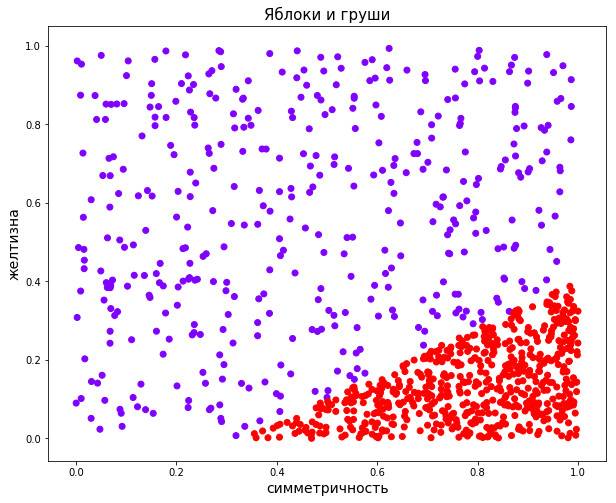

In [0]:
data = pd.read_csv("./data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [0]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

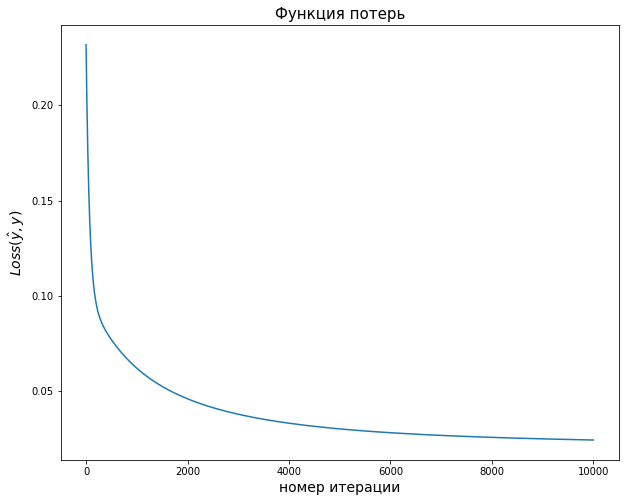

Wall time: 1.04 s


In [0]:
%%time

neuron = NeuronLeakyReLU(w=seed_random(13, X.shape[1], 1), b=seed_random(14, 1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

**Loss check:**

Printing the sum of the first five and last five values of loss'a when learning with num_epochs=10000, round to the 4th decimal place:

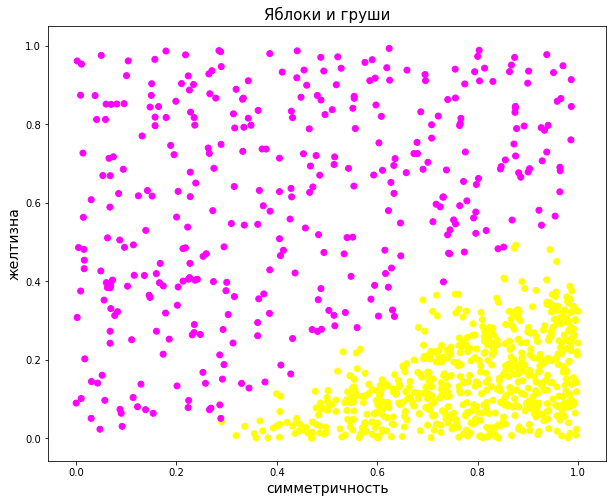

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Advantages LeakyReLU:**

* differentiable (with additional definition in zero)
* there is no problem of fading gradient, as in the sigmoid
* no "dead neurons" problem like in relax

**Potential disadvantages LeakyReLU:**

* not centered near 0 (may interfere with convergence rate)
* a bit not resistant to "noise" (see Stanford lectures)

<h2 style="text-align: center;"><b>Neuron with ELU (Exponential Linear Unit)</a></b></h2>  



\begin{equation*}
ELU(\alpha, x) =
 \begin{cases}
   \alpha (e^x - 1), &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

where $\alpha$ -- a small number from 0 to 1.

 $\alpha$:

\begin{equation*}
ELU'(x) = 
 \begin{cases}
   ELU(\alpha, x) + \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Here, the derivative uses a simple trick -- made $ - \alpha + \alpha$ to make it easier to calculate.

Graph of this function:

<img src="http://p0.ifengimg.com/pmop/2017/0907/A004001DD141881BFD8AD62E5D31028C3BE3FAD1_size14_w446_h354.png" width=500 height=400>

* ELU:

In [0]:
def elu(x, alpha=0.01):
    """ELU-функция"""
    mask = x < 0
    x[mask] = alpha * (np.exp(x[mask]) - 1)
    return x

In [0]:
def elu_derivative(y, alpha=0.01):
    """Производная ELU, опять вычисляем производную по значению"""
    deriv = np.ones((y.shape[0], 1))
    deriv[y < 0] = y[y < 0] + alpha

    return deriv

In [0]:
class NeuronELU:
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # Пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b
        
    def activate(self, x):
        return elu(x)
        
    def forward_pass(self, X):
        """
        Рассчитывает ответ нейрона при предъявлении набора объектов
        :param: X -- матрица примеров размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - предсказанные классы
        return self.activate(X @ self.w + self.b)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов нейрона в соответствии с этим объектом
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        
        # Можете проверить, что такие матричные перемножения дают именно то, что мы хотим
        w_grad = 1/n * (X * elu_derivative(y_pred)).T @ (y_pred - y) 
        self.w -= learning_rate * w_grad
        b_grad = (1 / n * elu_derivative(y_pred).T @ (y_pred - y))[0]
        self.b -= learning_rate * b_grad
    
    def fit(self, X, y, num_epochs=300):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        """
        if self.w is None:
            self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
            self.b = 0  # смещение (число)
        Loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
        
        return Loss_values

"Яблоки и Груши":

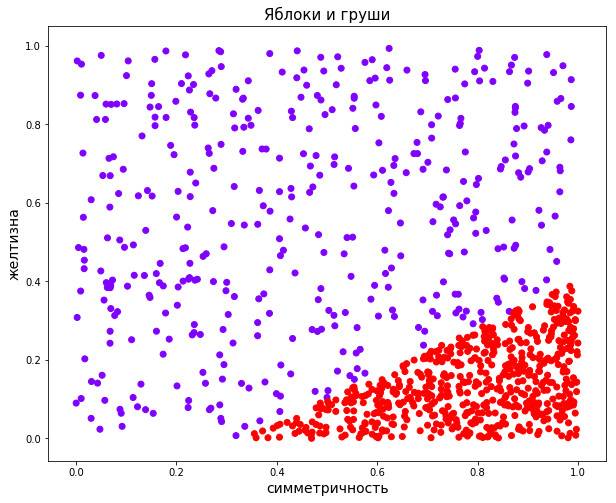

In [0]:
data = pd.read_csv("./data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [0]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

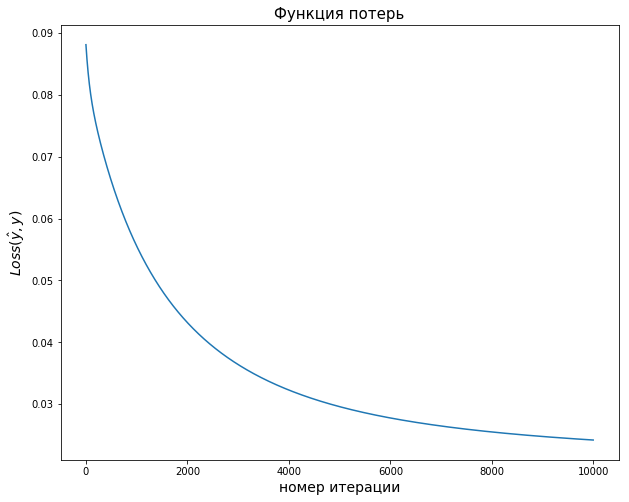

Wall time: 1.16 s


In [0]:
%%time

neuron = NeuronELU(w=seed_random(10, X.shape[1], 1), b=seed_random(11, 1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

**Loss check:**

Let's see a prediction of the neuron:

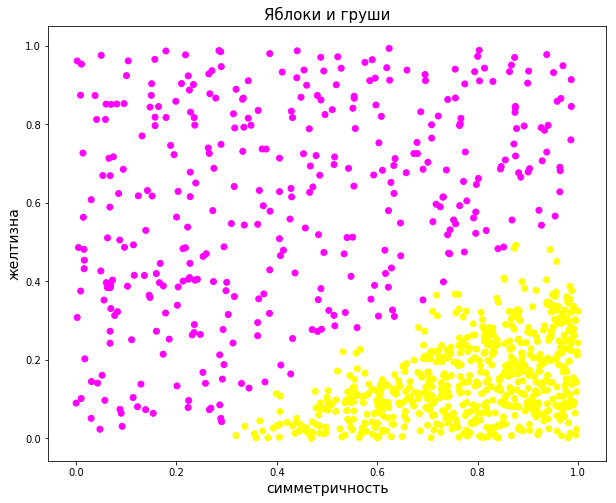

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Advantages ELU:**

* differentiable (with additional definition in zero)
* there is no problem of fading gradient, as in the sigmoid
* no "dead neurons" problem like in relax
* more resistant to "noise" (see Stanford lectures)

**Potential disadvantages ELU:**

* not well centered around 0 (may interfere with convergence rate)
* computationally longer than ReLU and LeakyReLU

---

<img src="http://cdn-images-1.medium.com/max/1600/1*DRKBmIlr7JowhSbqL6wngg.png">

---